# Teste de Mann Whitney (soma de postos de Wilxcom)

### Teste não paramétrico 
### Duas amostras independentes

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import levene
from statsmodels.stats.weightstats import ztest

enem_sp = pd.read_csv('/Users/paull/OneDrive/Área de Trabalho/LEONARDO/python/jupyter/enem_2019_tratado.csv',
                     sep = ',', encoding = 'iso-8859-1')

In [2]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [3]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

Objetivo:
Analisar a diferença entre as MEDIANAS de mulheres e homens para notas do colégiox

In [18]:
colegiox_mulher = colegiox.loc[colegiox.SEXO == 'F']

In [19]:
colegiox_mulher.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim
84,"1,90E+11",Águas de Lindóia,19,F,1,branca,1,2,pública,35017632.0,...,420.6,Espanhol,1.0,140.0,40.0,40.0,120.0,20.0,360.0,Sim
91,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,537.9,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim


In [6]:
colegiox_homens = colegiox.loc[colegiox.SEXO == 'M']

In [7]:
colegiox_homens.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
85,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,508.2,Espanhol,1.0,140.0,140.0,120.0,160.0,120.0,680.0,Sim
108151,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,705.3,Inglês,1.0,140.0,160.0,120.0,140.0,100.0,660.0,Sim
182519,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,480.9,Espanhol,1.0,100.0,120.0,100.0,100.0,100.0,520.0,Sim


In [12]:
# 1 analisar os tipos de variáveis
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

In [14]:
# 2 analisar se tem algum valor nulo
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

In [20]:
# 3) analise da normalidade
# teste de Shapiro Wilk
stats.shapiro(colegiox_mulher.NOTA_MT)

ShapiroResult(statistic=0.7194505929946899, pvalue=5.430648343462963e-06)

<function matplotlib.pyplot.show(close=None, block=None)>

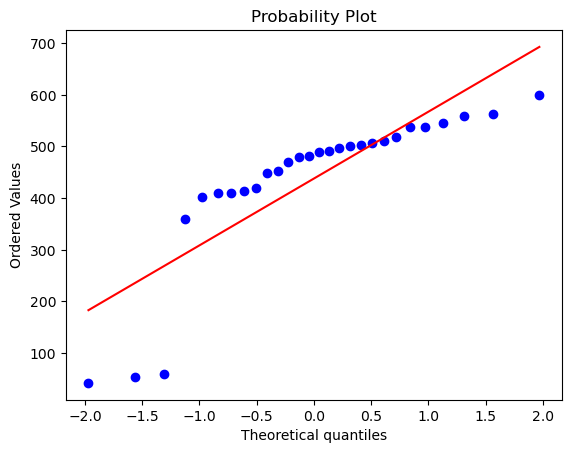

In [21]:
stats.probplot(colegiox_mulher['NOTA_MT'],dist= "norm", plot = plt)
plt.show

In [24]:
stats.shapiro(colegiox_homens.NOTA_MT)

ShapiroResult(statistic=0.8659597635269165, pvalue=0.04620101675391197)

In [25]:
# Teste de Shapiro-Wilk - Ciencias da natureza

<function matplotlib.pyplot.show(close=None, block=None)>

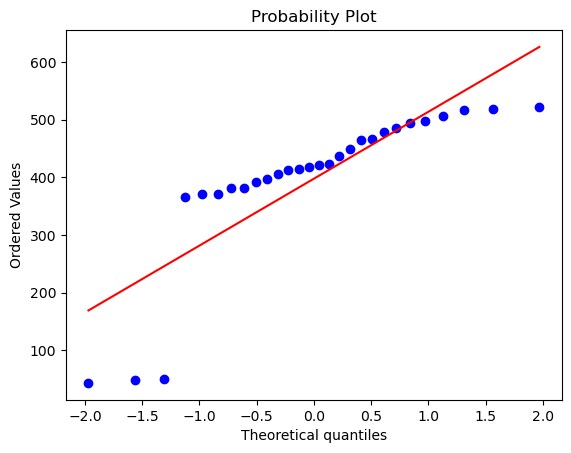

In [30]:
stats.probplot(colegiox_mulher['NOTA_CN'],dist="norm",plot = plt)
plt.show

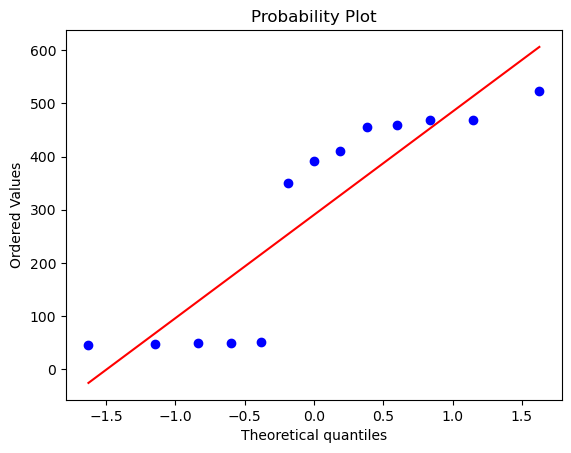

In [35]:
stats.probplot(colegiox_homens['NOTA_CN'], dist = "norm", plot = plt)
plt.show()

# Teste de Mann Witney


##### uso do teste não paramétrico de Mann Witney

Ho = Não há diferença entre as MEDIANAS das notas de HOMENS e MULHERES : P > 0.05
Ha = Há diferença entre as MEDIANAS das notas de HOMENS e MULHERES : P <= 0.05

In [54]:
stat, p = stats.mannwhitneyu(colegiox_mulher.NOTA_MT,  colegiox_homens.NOTA_MT)
print ('estatística valor de teste: {}'. format(stat.round(2)))
print('p-valor:{}'.format(p))


estatística valor de teste: 127.0
p-valor:0.12678483629218537


In [55]:
stat, p = stats.mannwhitneyu(colegiox_mulher.NOTA_CN, colegiox_homens.NOTA_CN)
print ('estatística valor de teste: {}'. format(stat.round(2)))
print('p-valor:{}'.format(p))

estatística valor de teste: 228.0
p-valor:0.20239601597295886


In [56]:
colegiox_homens.NOTA_CN.describe()

count     13.000000
mean     290.130769
std      202.857069
min       46.300000
25%       49.800000
50%      391.500000
75%      460.200000
max      523.100000
Name: NOTA_CN, dtype: float64

In [60]:
colegiox_mulher.NOTA_CN.describe()

count     28.000000
mean     397.785714
std      132.791189
min       43.400000
25%      381.875000
50%      420.300000
75%      480.275000
max      521.600000
Name: NOTA_CN, dtype: float64

In [57]:
colegiox_homens.NOTA_CH.describe()

count     13.000000
mean     438.707692
std      138.653125
min       56.100000
25%      379.700000
50%      458.500000
75%      515.500000
max      606.100000
Name: NOTA_CH, dtype: float64

In [61]:
colegiox_mulher.NOTA_CH.describe()

count     28.000000
mean     390.896429
std      190.853257
min       35.700000
25%      383.525000
50%      475.050000
75%      508.125000
max      564.800000
Name: NOTA_CH, dtype: float64

In [58]:
colegiox_homens.NOTA_MT.describe()

count     13.000000
mean     501.515385
std      164.496808
min       59.500000
25%      442.600000
50%      513.900000
75%      588.800000
max      705.700000
Name: NOTA_MT, dtype: float64

In [62]:
colegiox_mulher.NOTA_MT.describe()

count     28.000000
mean     437.928571
std      146.875707
min       42.400000
25%      413.375000
50%      485.150000
75%      512.550000
max      599.500000
Name: NOTA_MT, dtype: float64

In [59]:
colegiox_homens.NOTA_LC.describe()

count     13.000000
mean     478.676923
std      139.235216
min       44.100000
25%      471.900000
50%      494.500000
75%      557.300000
max      576.600000
Name: NOTA_LC, dtype: float64

In [63]:
colegiox_mulher.NOTA_LC.describe()

count     28.000000
mean     452.050000
std      171.433964
min       45.800000
25%      473.200000
50%      524.150000
75%      536.525000
max      574.600000
Name: NOTA_LC, dtype: float64

In [65]:
colegiox_homens.NOTA_REDACAO.describe()

count     13.000000
mean     518.461538
std      102.781820
min      340.000000
25%      480.000000
50%      520.000000
75%      600.000000
max      680.000000
Name: NOTA_REDACAO, dtype: float64

In [64]:
colegiox_mulher.NOTA_REDACAO.describe()

count     28.000000
mean     532.857143
std      106.139571
min      280.000000
25%      515.000000
50%      540.000000
75%      600.000000
max      720.000000
Name: NOTA_REDACAO, dtype: float64

<AxesSubplot:xlabel='SEXO', ylabel='NOTA_MT'>

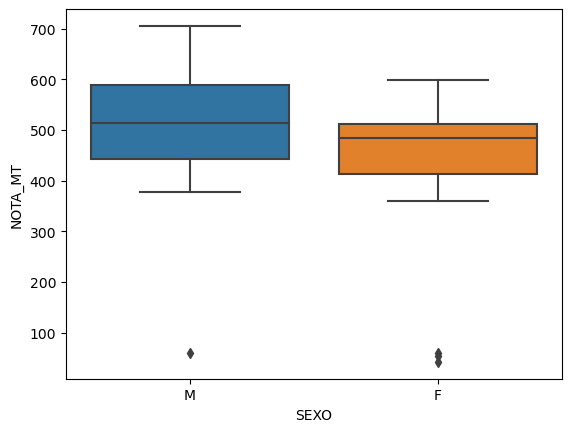

In [69]:
sns.boxplot(data = colegiox, x = "SEXO", y = "NOTA_MT")

<AxesSubplot:xlabel='SEXO', ylabel='NOTA_CN'>

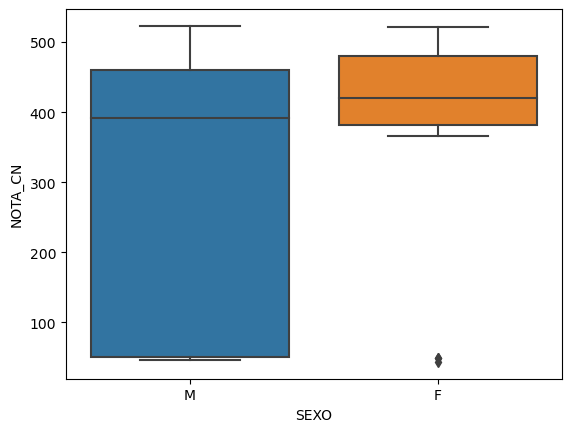

In [70]:
sns.boxplot(data = colegiox, x = "SEXO", y = "NOTA_CN")

CONCLUSÃO: Estatísticamente, com intervalo de confiança de 95%, não se pode concluir qie a mediana das notas de Matemática e Ciências da natureza do colegio x sejam diferentes entre homens e mulheres.